# Exercise 1: directed and switching graphs

In [1]:
# header to start
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
import pickle
from scipy.linalg import expm

In [2]:
def getLaplacian(E, n_vertices, directed=False):
    L = np.zeros((n_vertices, n_vertices))
    for e in E:
        if directed:
            L[e[1]][e[1]] += 1
            L[e[1]][e[0]] = -1
        else:
            L[e[1]][e[1]] += 1
            L[e[0]][e[0]] += 1
            L[e[1]][e[0]] = -1
            L[e[0]][e[1]] = -1
    return L

def ifRootedOutBranching(e):
    for col in e.T:
        nonzero = np.count_nonzero(col)
        all_nonzero = np.shape(col)[0] == nonzero
        all_not_negative = np.sum(col) == np.sum(np.positive(col)) and np.sum(col) != 0
        if all_nonzero and all_not_negative:
            return True
    
    return False

def switchGraphSim(graph_list, tswitch, switch_max, n_vertices):
    n = len(graph_list)
    dt = 0.01
    switch = 0
    t_after_switch = 0
    x = 10 * np.random.random_sample((n_vertices, 1))
    xs = np.zeros((n_vertices, 0))
    t = 0
    ts = []
    while switch < switch_max:
        L = graph_list[switch % n]
        x = -np.matmul(L, x)*dt + x
        xs = np.hstack((xs, x))
        ts.append(t)
        t += dt
        t_after_switch += dt
        if t_after_switch >= tswitch:
            switch += 1
            t_after_switch = 0
    
    return xs, ts

You are given four examples of sets of four **directed** graphs:
* In the first example, contained in the directory Exercise1_Graph10a, all the graphs contain 10 vertices
* In the second example, contained in the directory Exercise1_Graph10b, all the graphs contain 10 vertices
* In the third example, contained in the directory Exercise1_Graph100a, all the graphs contain 100 vertices
* In the last example, contained in the directory Exercise1_Graph100b, all the graphs contain 100 vertices

The following code can be used to load each graph and compute its Laplacian.

In [3]:
# to load the list of edges from file, you can do the following
# with open('Exercise1_Graph10a/graph1.pickle', 'rb') as f:
#     E = pickle.load(f)

# the laplacian can then be found using
# L = getLaplacian(E, 10, directed=True)

# note that it is possible to find the eigenvalues of a function using the function
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eigvals.html
# np.linalg.eigvals()

# it is possible to sort an array of numbers using
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.sort.html
# np.sort()

# it is possible to find the exponential of a matrix using
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.expm.html#scipy.linalg.expm
# scipy.linalg.expm()

## Question 1

For all the graphs in all the examples, which graph contains a path from vertex 1 to vertex 10? What is then the minimum path length? Explain how you computed the answer.

We have the following property: for any directed graph, and any $\delta > 0$ we have,

$$\Big[e^{-\delta\mathbf{L}(\mathcal{D})}\Big]_{ij} > 0$$

if and only if $i = j$ or there is a directed path of any length from $j$ to $i$. Otherwise the entry is null.

Since now we want to find whether there is a path between the first and the tenth vertex we only need to look at the (9, 0) element of each of the exponentials. If it is larger than zero then we have a path connecting the two vertices, for simplicity we can let $\delta = 1$.

In [4]:
folders = ['Exercise1_Graph10a/', 'Exercise1_Graph10b/', 'Exercise1_Graph100a/', 'Exercise1_Graph100b/']
graphs = ['graph1.pickle', 'graph2.pickle', 'graph3.pickle', 'graph4.pickle']

for folder in folders:
    for graph in graphs:
        dir = folder + graph
        with open(dir, 'rb') as f:
            E = pickle.load(f)
            try:
                L = getLaplacian(E, 10, directed=True)
            except:
                L = getLaplacian(E, 100, directed=True)
            e = expm(-L)
            path_exist = e[9, 0]
            if path_exist > 0:
                print('For the graph {} there is a path connecting vertex 1 and 10.'.format(dir, path_exist))

For the graph Exercise1_Graph10a/graph2.pickle there is a path connecting vertex 1 and 10.
For the graph Exercise1_Graph10b/graph2.pickle there is a path connecting vertex 1 and 10.
For the graph Exercise1_Graph100a/graph1.pickle there is a path connecting vertex 1 and 10.
For the graph Exercise1_Graph100a/graph3.pickle there is a path connecting vertex 1 and 10.
For the graph Exercise1_Graph100a/graph4.pickle there is a path connecting vertex 1 and 10.
For the graph Exercise1_Graph100b/graph4.pickle there is a path connecting vertex 1 and 10.


## Question 2

For each of these graphs, which one contains a rooted-out branching? Why?

We have the following property: for a directed graph $\mathcal{D}$ it has a rooted-out branching if and only if for any $\delta > 0$, at least one of the columns of $e^{-\delta\mathbf{L}(\mathcal{D})}$ contains only positive entries.

To test this we can check the two following criterions:
 - The number of nonzero elements are the same as the number of the elements
 - The sum of the column is the same as the sum of its absolute version 

As we can see none of the graphs contains a rooted-out branching.

In [5]:
folders = ['Exercise1_Graph10a/', 'Exercise1_Graph10b/', 'Exercise1_Graph100a/', 'Exercise1_Graph100b/']
graphs = ['graph1.pickle', 'graph2.pickle', 'graph3.pickle', 'graph4.pickle']

for folder in folders:
    for graph in graphs:
        dir = folder + graph
        with open(dir, 'rb') as f:
            E = pickle.load(f)
            try:
                L = getLaplacian(E, 10, directed=True)
            except:
                L = getLaplacian(E, 100, directed=True)
            e = expm(-L)
            if ifRootedOutBranching(e):
                print('Graph {} has a rooted-out branching'.format(dir))

## Question 3

Assume that for each of the four examples, we implement the consensus protocol where the graphs are switching amoung the four possible graphs, one after the other (after graph 6 we switch back to graph 1). Which of these examples will lead to a converging consensus protocol? Why?

We have the property: for any two graphs $\mathcal{D}_1$ and $\mathcal{D}_2$,

$$\Big[e^{-\delta\mathbf{L}(\mathcal{D}_1)}e^{-\delta\mathbf{L}(\mathcal{D}_2)}\Big]_{ij} > 0$$

if and only if $i = j$ or there exists at least one $k$ such that there is a directed path in $\mathcal{D}_1$ from $j$ to $k$ and a path in $\mathcal{D}_2$ from $k$ to $i$. Otherwise the entry is 0.

Thus all we need to do is to compute,

$$\prod_{i = 4}^{N}{e^{-\delta\mathbf{L}(\mathcal{D}_i)}}$$

and see if it contains a rooted-out branching, if it does than the systen will lead to convergence.

In [8]:
folders = ['Exercise1_Graph10a/', 'Exercise1_Graph10b/', 'Exercise1_Graph100a/', 'Exercise1_Graph100b/']
graphs = ['graph1.pickle', 'graph2.pickle', 'graph3.pickle', 'graph4.pickle']

for folder in folders:
    e_list = []
    for graph in graphs:
        dir = folder + graph
        with open(dir, 'rb') as f:
            E = pickle.load(f)
            try:
                L = getLaplacian(E, 10, directed=True)
            except:
                L = getLaplacian(E, 100, directed=True)
            e = expm(-L)
            e_list.append(e)
    
    e_sum = np.matmul(e_list[0], e_list[1])
    e_sum = np.matmul(e_sum, e_list[2])
    e_sum = np.matmul(e_sum, e_list[3])
    
    if ifRootedOutBranching(e_sum):
        print('Graph {} has a rooted-out branching'.format(folder))

Graph Exercise1_Graph10a/ has a rooted-out branching
Graph Exercise1_Graph100a/ has a rooted-out branching


## Question 4

Simulate the consensus protocol for the four switching graphs examples and verify your answer to the previous question (use random initial conditions uniformly distributed between -10 and 10). Assume that the graphs are switching every 0.1 seconds in a first case and every 1 seconds in the second case. Plot the state of every vertex as a function of time in a graph (one graph per example). How is the convergence speed influenced by switching time?

We can see that the shorter the swtiching time the faster the convergence. However, this not true for all cases, for example if we have a system where one of the graphs contains a rooted-out branching and the others do not, the longer you spend on the graph that contains a rooted-out branching the faster the convergence.

<IPython.core.display.Javascript object>


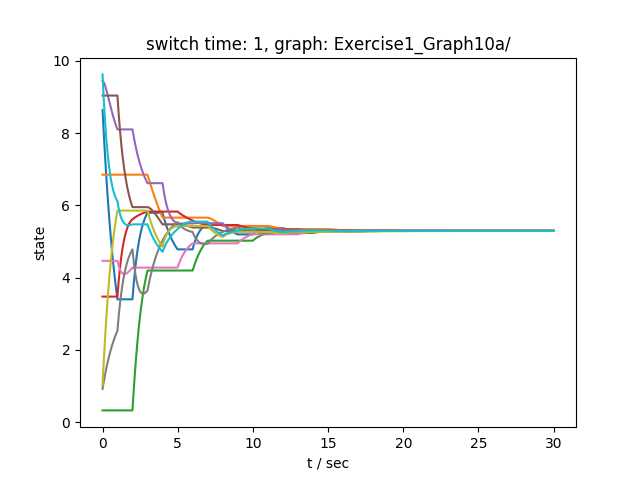

<IPython.core.display.Javascript object>


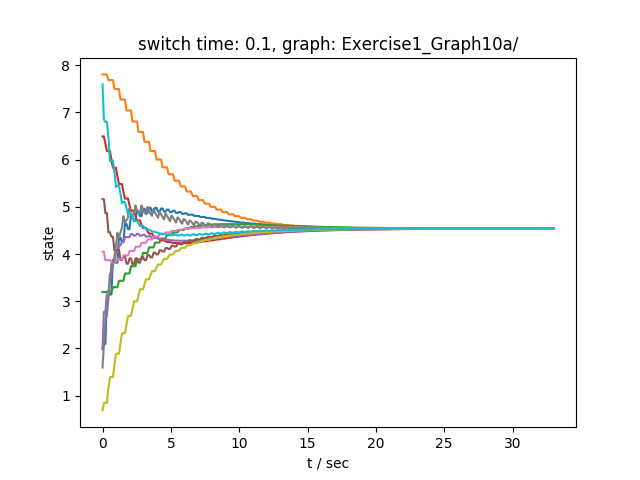

<IPython.core.display.Javascript object>


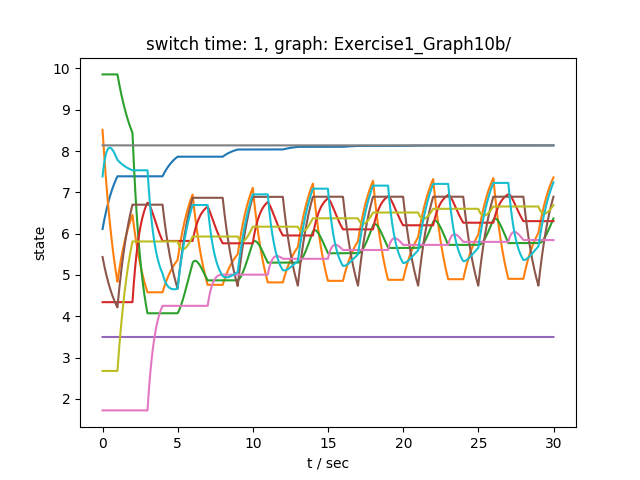

<IPython.core.display.Javascript object>


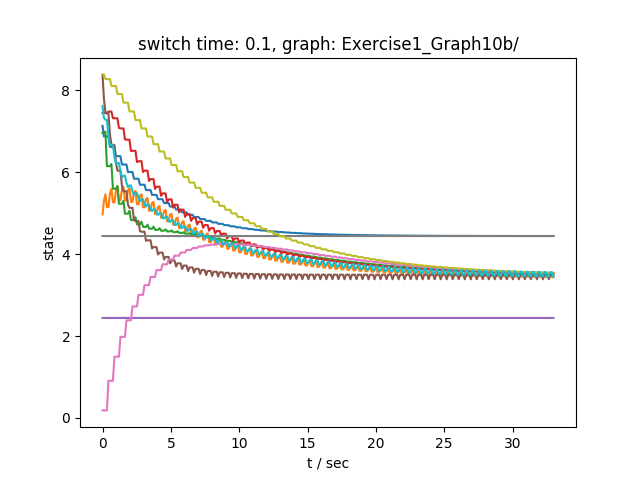

<IPython.core.display.Javascript object>


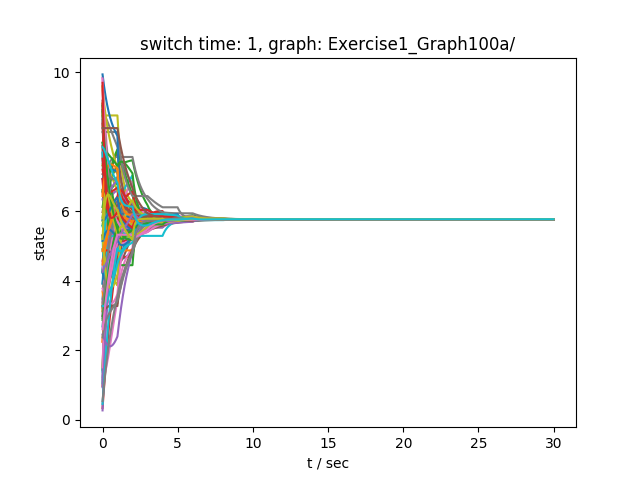

<IPython.core.display.Javascript object>


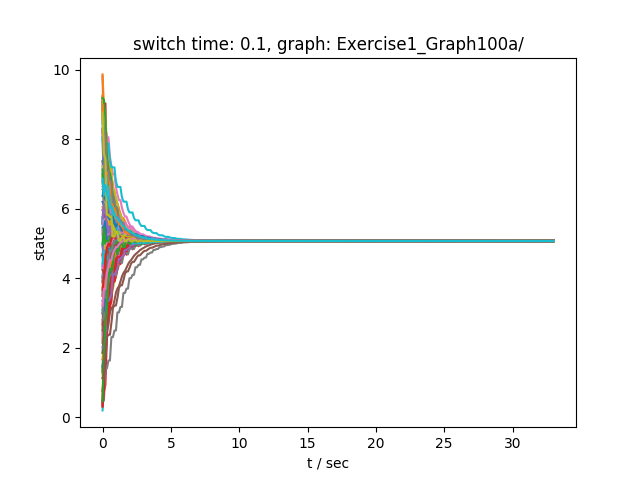

<IPython.core.display.Javascript object>


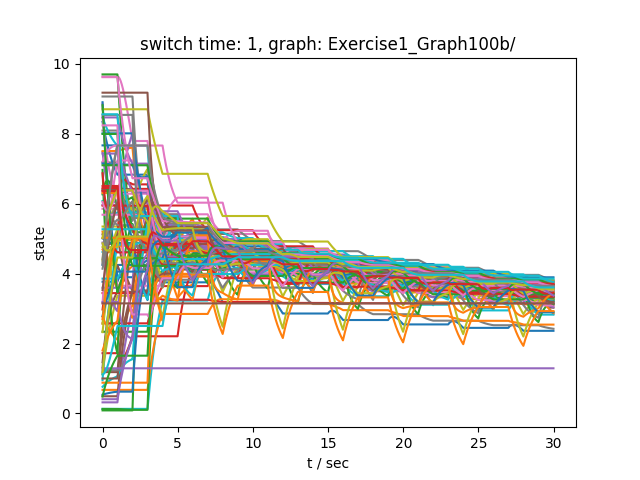

<IPython.core.display.Javascript object>


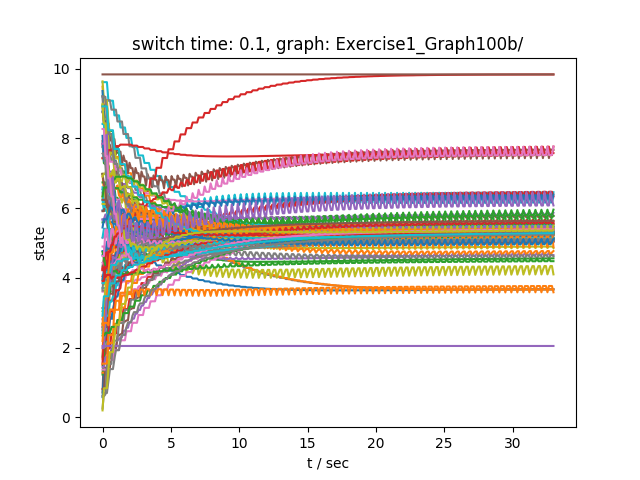

In [10]:
folders = ['Exercise1_Graph10a/', 'Exercise1_Graph10b/', 'Exercise1_Graph100a/', 'Exercise1_Graph100b/']
graphs = ['graph1.pickle', 'graph2.pickle', 'graph3.pickle', 'graph4.pickle']

for folder in folders:
    graph_list = []
    for graph in graphs:
        dir = folder + graph
        with open(dir, 'rb') as f:
            E = pickle.load(f)
            try:
                L = getLaplacian(E, 10, directed=True)
                n_vertices = 10
            except:
                L = getLaplacian(E, 100, directed=True)
                n_vertices = 100
            graph_list.append(L)
    xs, ts = switchGraphSim(graph_list, 1, 30, n_vertices)
    
    plt.figure()
    for i in range(xs.shape[0]):
        plt.plot(ts, xs[i, :])
    plt.title("switch time: {}, graph: {}".format(1, folder))
    plt.xlabel('t / sec')
    plt.ylabel('state')
    
    xs, ts = switchGraphSim(graph_list, 0.1, 300, n_vertices)
    
    plt.figure()
    for i in range(xs.shape[0]):
        plt.plot(ts, xs[i, :])
    plt.title("switch time: {}, graph: {}".format(0.1, folder))
    plt.xlabel('t / sec')
    plt.ylabel('state')
    
    